Dmitry Kononov, [10.12.2024 10:38]
Коллеги, это файл к первой задаче для деконволюции двумерной картинки. Собственно, в файле размытая картинка. Она размыта с гауссианой, у которой дисперсия (то есть сигма в знаменателе показателя степени) равна 10

Ваша задача — получить оригинальную картинку

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#открываем файл
data = np.zeros([121,121])
with open("blurred.dat") as f:
      for line in f:
          i,j,value = map(float,line.split(' '))
          data[int(i)+60,int(j)+60] = float(value)

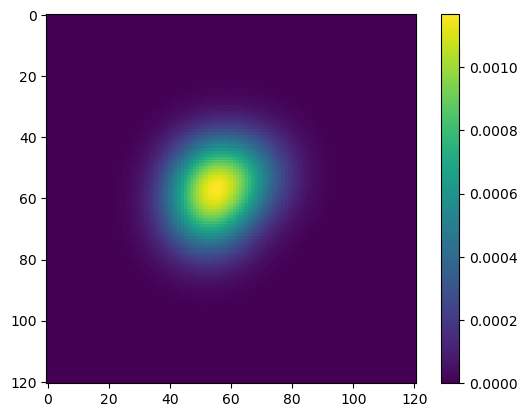

In [3]:
plt.imshow(data/np.sum(data))
plt.colorbar()

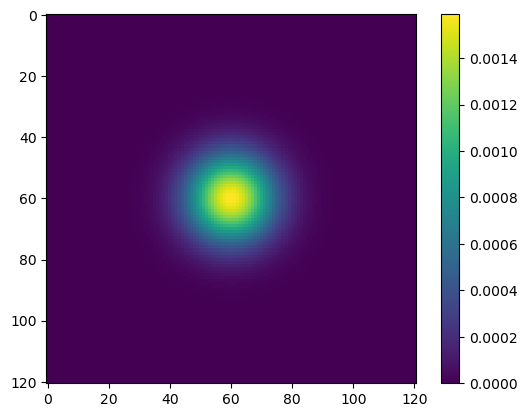

In [4]:
def gaussian_2d(x, y, sigma=1.0):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))
def gaussian_kernel(size, sigma=1.0):
    kernel = np.fromfunction(
        lambda x, y: gaussian_2d(x - (size - 1) / 2, y - (size - 1) / 2, sigma),
        (size, size)
    )
    return kernel / kernel.sum()
gaus_121 = gaussian_kernel(121,sigma=10)
plt.imshow(gaus_121)
plt.colorbar()

# Мое решение

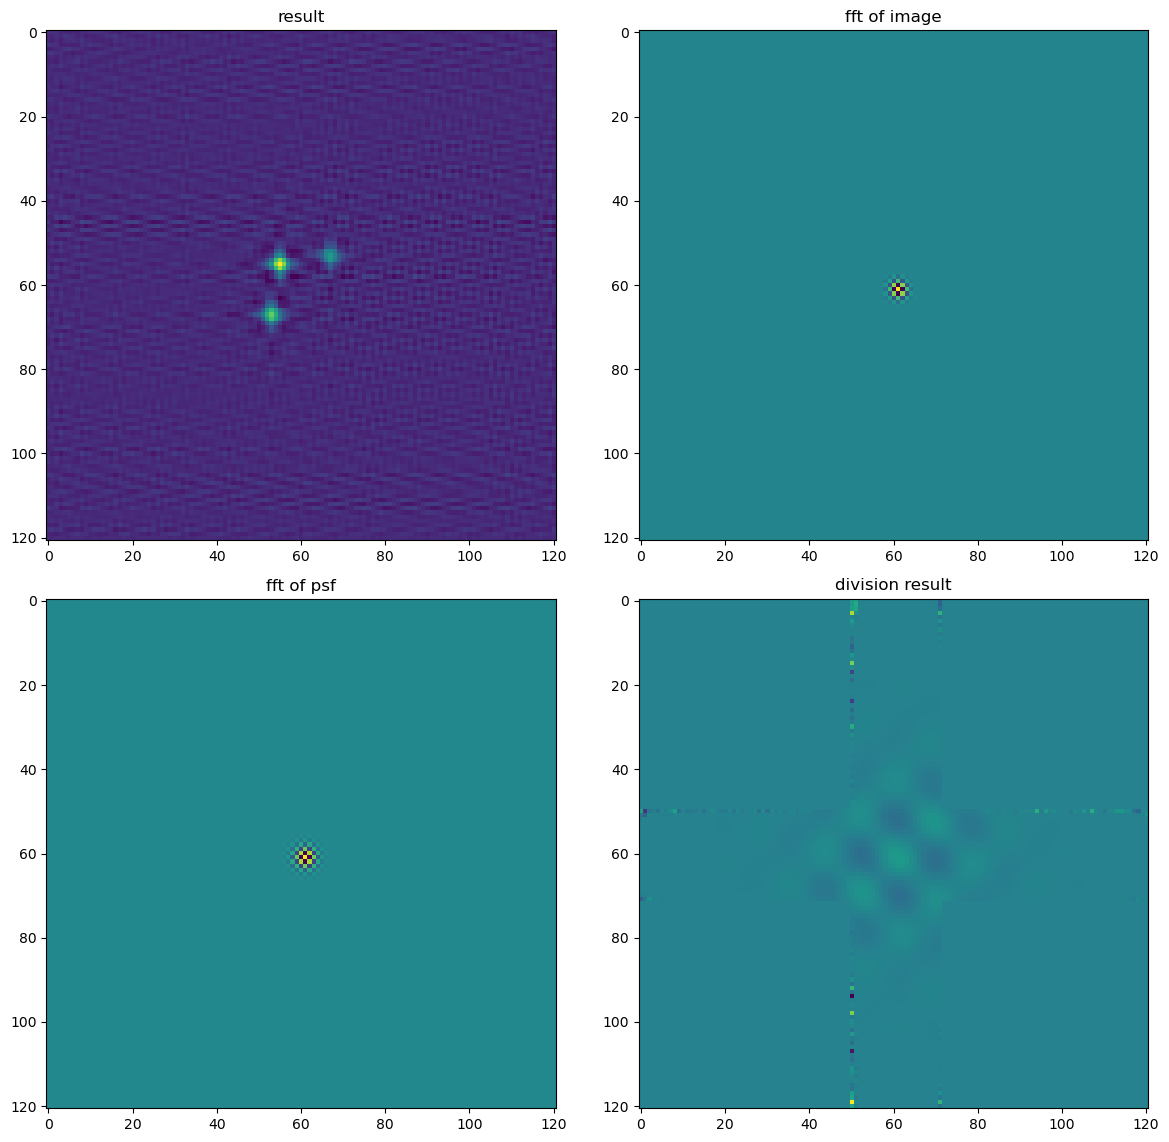

In [5]:
gaus_121 = gaussian_kernel(121,sigma=10)

fft_func = np.fft.fft2(data)
fft_gauss = np.fft.fft2(gaus_121)

s = fft_func/fft_gauss

#фильтр s
num_elements_to_zero = 99
#Фильтр 1
# Вычисляем начальный и конечный индекс для зануления
start_idx = (121 - num_elements_to_zero) // 2
end_idx = start_idx + num_elements_to_zero

# Зануляем элементы в диапазоне
s[start_idx:end_idx,start_idx:end_idx] = 0
#####
ifft_s = np.fft.ifftshift(np.fft.ifft2(s))

# Создание подграфиков (3 строки и 1 столбец)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# plt.suptitle(sg)
# Построение графика 1 в первом подграфике
axs[0,0].imshow(ifft_s.real)
axs[0,0].set_title('result')

# Построение графика 2 во втором подграфике
axs[0,1].imshow(np.fft.ifftshift(fft_func.real))
axs[0,1].set_title('fft of image')

# Построение графика 3 в третьем подграфике
axs[1,0].imshow(np.fft.ifftshift(fft_gauss.real))
axs[1,0].set_title('fft of psf')

# Построение графика 4 в четвертом подграфике
axs[1,1].imshow(np.fft.ifftshift(s.real))
axs[1,1].set_title('division result')


# Отображение графиков
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Коррекция для правильного отображения заголовка
plt.show()


# Изменим немного диссперсию в гауссу

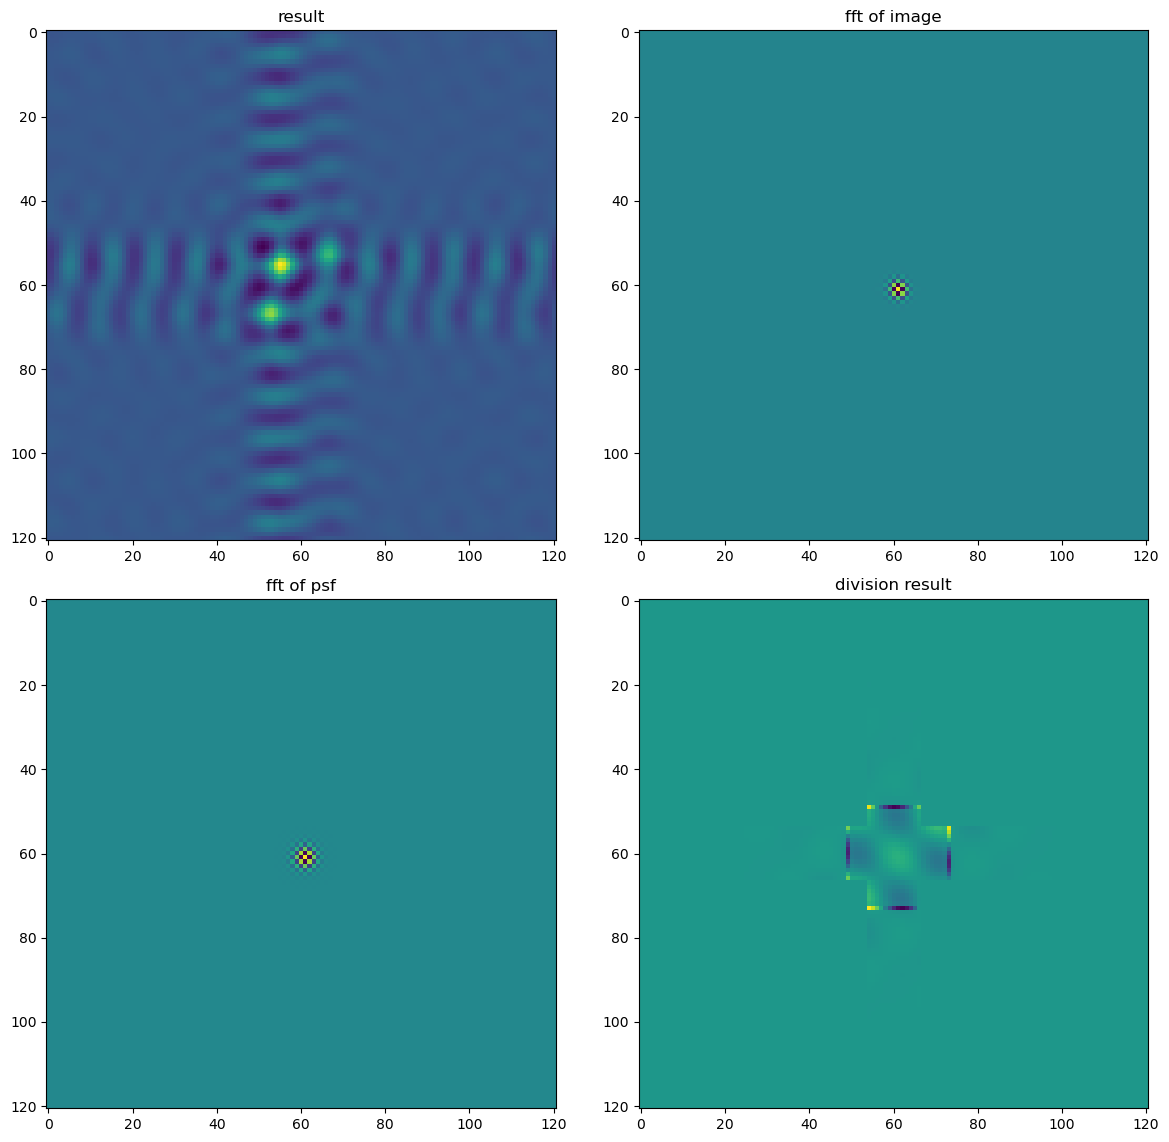

In [6]:
#изменим дисперсию 
gaus_121 = gaussian_kernel(121,sigma=10.2)


fft_func = np.fft.fft2(data/np.sum(data))
# fft_func = np.fft.fft2(data)
fft_gauss = np.fft.fft2(gaus_121)

s = fft_func/fft_gauss

#фильтр s
num_elements_to_zero = 108
#Фильтр 1
# Вычисляем начальный и конечный индекс для зануления
start_idx = (121 - num_elements_to_zero) // 2
end_idx = start_idx + num_elements_to_zero

# Зануляем элементы в диапазоне
s[start_idx:end_idx,start_idx:end_idx] = 0
#####


ifft_s = np.fft.ifftshift(np.fft.ifft2(s))

# Создание подграфиков (3 строки и 1 столбец)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
# plt.suptitle(sg)
# Построение графика 1 в первом подграфике
axs[0,0].imshow(ifft_s.real)
axs[0,0].set_title('result')

# Построение графика 2 во втором подграфике
axs[0,1].imshow(np.fft.ifftshift(fft_func.real))
axs[0,1].set_title('fft of image')

# Построение графика 3 в третьем подграфике
axs[1,0].imshow(np.fft.ifftshift(fft_gauss.real))
axs[1,0].set_title('fft of psf')

# Построение графика 4 в четвертом подграфике
axs[1,1].imshow(np.fft.ifftshift(s.real))
axs[1,1].set_title('division result')


# Отображение графиков
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Коррекция для правильного отображения заголовка
plt.show()

##  попробуем вероятностонное

In [7]:
data.flatten()

array([9.53841961e-13, 1.31614309e-12, 2.02267909e-12, ...,
       9.17811313e-13, 7.38888592e-13, 7.62550456e-13])

In [52]:
gy2_raw[gy2_raw<0.0001]=0

[array([ True,  True,  True, ...,  True,  True,  True])]

In [75]:
#Implementation of the Lucy Algorithm
import numpy as np
import matplotlib.pyplot as plt

# sg represents the resolution parameter used to load specific data profiles
sg = 32

# Load the spectral data from the 'spec001.dat' file (original distribution for control)
# res_x, res_y = np.genfromtxt('spec001.dat', unpack=True)

# Load the observed profile (result of convolution of the original distribution with PSF)
# x1, y1 = np.genfromtxt('res_profs/res_prof_d{}.dat'.format(sg), unpack=True)
y1 = data[30:-30,30:-30].flatten()
x1 =  np.arange(len(y1))
y1[y1<0.01]=0


# Load the Gaussian PSF (Point Spread Function) for the given resolution (sg)
# gx2_raw, gy2_raw = np.genfromtxt('g_func//gauss_func_d{}.dat'.format(sg), unpack=True)
gy2_raw = gaus_121[30:-30,30:-30].flatten()
gy2_raw[gy2_raw<0.0001]=0
gy2_raw = gy2_raw/np.sum(gy2_raw)
gx2_raw = np.arange(len(gy2_raw.flatten()))


'''test'''
gy2_raw[gy2_raw<0.0001]=0


res_x, res_y = x1, y1
# gaus_121[30:-30,30:-30]
# Adjust the length of y1 (observed profile) to match the length of res_y by slicing
le = (len(y1) - len(res_y)) // 2
# y = np.zeros(2 * le + 1)
# y[:] = y1[le:-le]

le = (len(y1) - len(res_y)) // 2
# y = np.zeros(2 * le + 1)
y = np.zeros_like(y1)
# y[:] = y1[le:-le]
y[:]=y1

In [72]:
y.shape

(1,)

In [76]:
# Normalize the Gaussian function (gy2_raw) to use as the PSF for the convolution process
gy = np.zeros(int(round((len(gx2_raw) + 1) / 2)))
gy[:] = gy2_raw[int(round((len(gx2_raw) - 1) / 2)):]
gy = gy / (2 * np.sum(gy) - gy[0])
# gy = gy2_raw/np.sum(gy2_raw)
# Number of points in the Gaussian kernel (PSF)
N = len(gy)

# Create the convolution matrix (using vectorization for efficiency)
p = np.zeros([N, N])
p = np.array([[gy[abs(i - j)] for j in range(N)] for i in range(N)])  # Matrix built from the PSF

# Initialize the initial guess (psi) and the target observed distribution (phi_t)
phi_t = y / np.sum(y)  # Normalized observed profile (result of convolution)

'''test'''
psi = np.ones_like(phi_t) / len(phi_t)  # Initial guess (uniform distribution)
# psi = gy2_raw/np.sum(gy2_raw)


# Tolerance and iteration counter
sigm = 1
count = 0
max_iterations = 1  # Maximum allowed iterations
tolerance = 1e-14# Convergence criterion

# Iterative loop for the Lucy-Richardson deconvolution
while sigm > tolerance:
    if count > max_iterations:
        break

    # Calculate the current convolution result (convolved estimate)
    phi0 = psi @ p

    # Calculate Q_pr (for convergence check)
    Q_pr = np.sum(phi_t * np.log(phi0))

    # Update psi using the Lucy-Richardson update rule
    delta_psi = psi * ((phi_t / phi0) @ p - 1)
    psi += delta_psi

    # Recalculate the new phi (updated estimate of the original distribution)
    phi = psi @ p

    # Calculate Q (for convergence check)
    Q = np.sum(phi_t * np.log(phi))

    # Update the convergence criterion (based on Q values)
    sigm = np.sqrt((Q - Q_pr) ** 2 / Q_pr ** 2)

    # Increment the iteration counter
    count += 1

# Calculate final error after exiting the loop
sigm_fin = np.sqrt(np.sum((phi - phi_t) ** 2) / N)
print(f"Final sigma: {sigm_fin}")
print(f"Iterations: {count}")

# Plotting the results: PSF, observed distribution, recovered distribution, and original distribution
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Panel 1: PSF (Point Spread Function)
axs[0, 0].plot(gx2_raw, gy2_raw, label='PSF (Gaussian)')
axs[0, 0].set_title('PSF (Gaussian)')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].legend()

# Panel 2: Observed distribution (convolved result)
axs[0, 1].plot(x1, y1, label='Observed Profile', color='orange')
axs[0, 1].set_title('Observed Profile (Convolved)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('Intensity')
axs[0, 1].legend()

# Panel 3: Recovered distribution (from deconvolution)
axs[1, 0].plot(res_x, psi, label='Recovered Profile', color='green')
axs[1, 0].set_title('Recovered Profile (Deconvolved)')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('Intensity')
axs[1, 0].legend()

# Panel 4: Original distribution (for control)
axs[1, 1].plot(ifft_s.real.flatten(), label='Original Profile', color='red')
axs[1, 1].set_title('Original Profile (Control)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('Intensity')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1861 is different from 3721)

In [66]:
p.shape, gy2_raw.shape

((1861, 1861), (3721,))

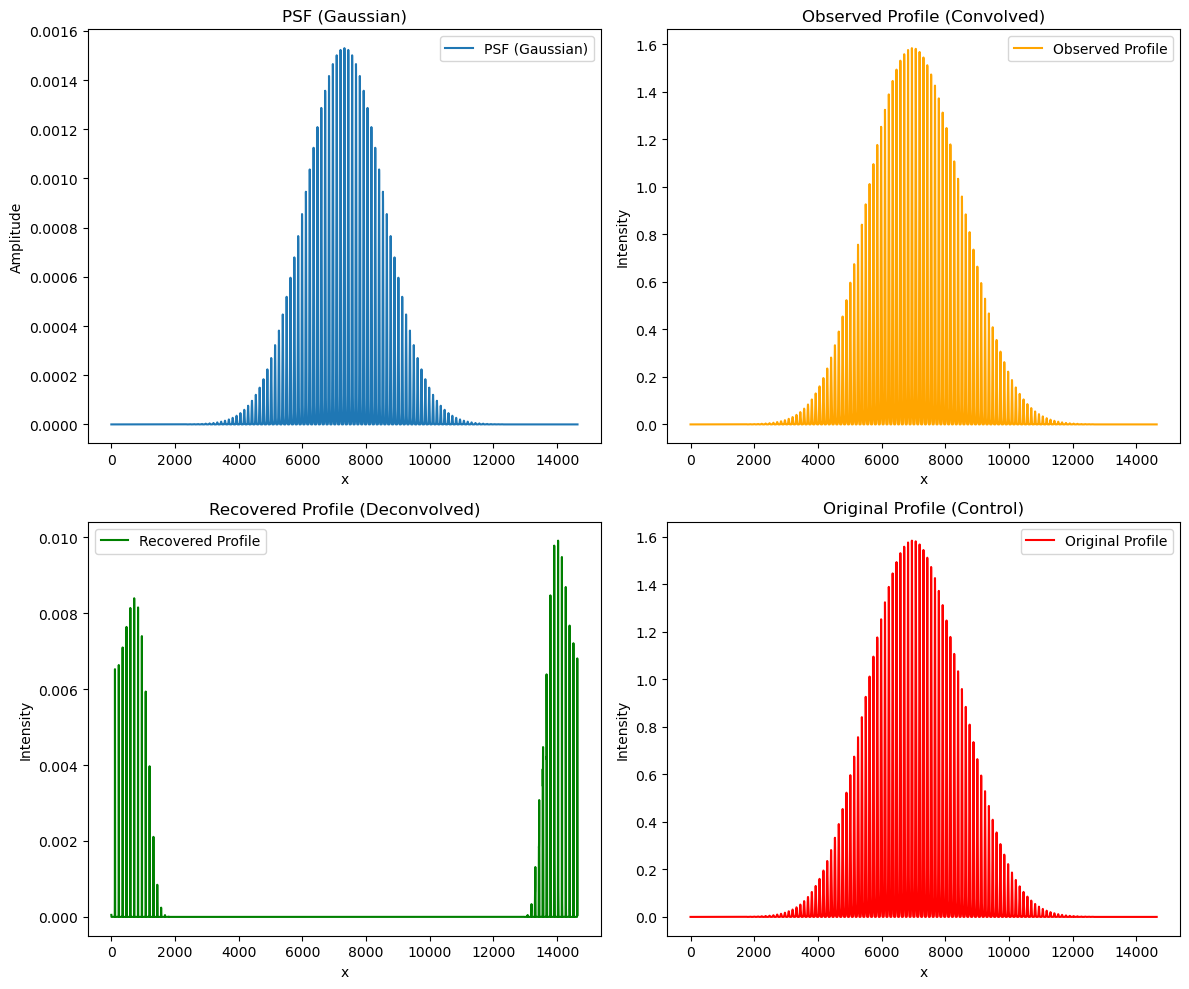

In [23]:
# Plotting the results: PSF, observed distribution, recovered distribution, and original distribution
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Panel 1: PSF (Point Spread Function)
axs[0, 0].plot(gx2_raw, gy2_raw, label='PSF (Gaussian)')
axs[0, 0].set_title('PSF (Gaussian)')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].legend()

# Panel 2: Observed distribution (convolved result)
axs[0, 1].plot(x1, y1, label='Observed Profile', color='orange')
axs[0, 1].set_title('Observed Profile (Convolved)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('Intensity')
axs[0, 1].legend()

# Panel 3: Recovered distribution (from deconvolution)
axs[1, 0].plot(res_x, psi, label='Recovered Profile', color='green')
axs[1, 0].set_title('Recovered Profile (Deconvolved)')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('Intensity')
axs[1, 0].legend()

# Panel 4: Original distribution (for control)
axs[1, 1].plot(res_x, res_y, label='Original Profile', color='red')
axs[1, 1].set_title('Original Profile (Control)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('Intensity')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


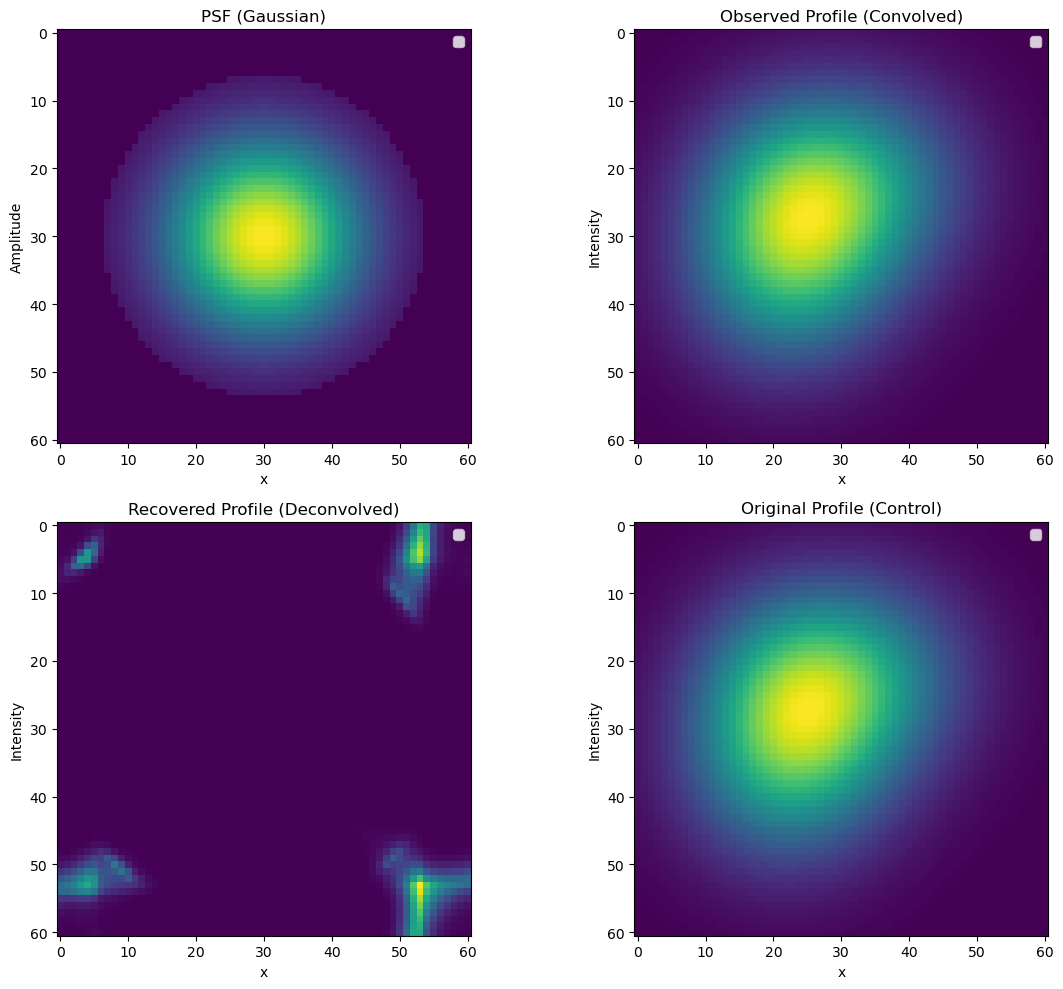

In [59]:

size = int(np.sqrt(len(gy2_raw)))
size = (size,size)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Panel 1: PSF (Point Spread Function)
axs[0, 0].imshow(gy2_raw.reshape(size), label='PSF (Gaussian)')
axs[0, 0].set_title('PSF (Gaussian)')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].legend()

# Panel 2: Observed distribution (convolved result)
axs[0, 1].imshow(y.reshape(size), label='Observed Profile')
axs[0, 1].set_title('Observed Profile (Convolved)')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('Intensity')
axs[0, 1].legend()

# Panel 3: Recovered distribution (from deconvolution)
axs[1, 0].imshow(psi.reshape(size), label='Recovered Profile')
axs[1, 0].set_title('Recovered Profile (Deconvolved)')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('Intensity')
axs[1, 0].legend()

# Panel 4: Original distribution (for control)
axs[1, 1].imshow(res_y.reshape(size), label='Original Profile')
axs[1, 1].set_title('Original Profile (Control)')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('Intensity')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

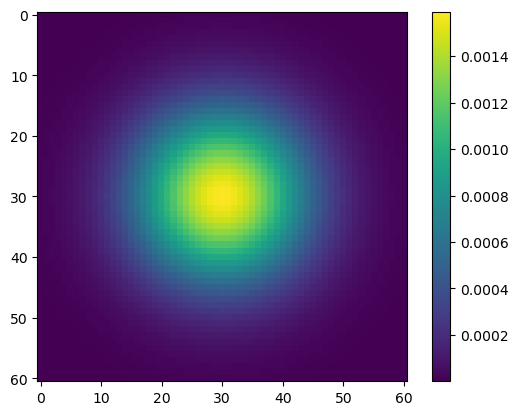

In [21]:
def gaussian_2d(x, y, sigma=1.0):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))
def gaussian_kernel(size, sigma=1.0):
    kernel = np.fromfunction(
        lambda x, y: gaussian_2d(x - (size - 1) / 2, y - (size - 1) / 2, sigma),
        (size, size)
    )
    return kernel / kernel.sum()
gaus_121 = gaussian_kernel(121,sigma=10)
plt.imshow(gaus_121[30:-30,30:-30])
plt.colorbar()